In [1]:
import numpy as np
import pandas as pd

In [2]:
df_hbo = pd.read_csv('hbo.csv')
df_claro = pd.read_csv('claro.csv')
df_sony = pd.read_csv('sony.csv')
df_netflix = pd.read_csv('netflix.csv')
df_flow = pd.read_csv('flow.csv')
df_amazon = pd.read_csv('amazon.csv')
df_on_video = pd.read_csv('on_video.csv')
df_fox = pd.read_csv('fox.csv')

In [3]:
df_hbo.head(2)

,Unnamed: 0,Unnamed: 0.1,id,title,title_original,genres,director,keywords,cast,genre_empty
0,0,0,1183,2 Fast 2 Furious: A todo gas 2,2 Fast 2 Furious,"['Acción', 'Crimen', 'Suspense']",['John Singleton'],"['miami', 'car race', 'sports car', 'los angel...","['Paul Walker', 'Tyrese Gibson', 'Eva Mendes',...",32
1,2,2,1457,21 gramos,21 Grams,"['Drama', 'Crimen', 'Suspense']",['Alejandro González Iñárritu'],"['life and death', 'loss of loved one', 'trans...","['Sean Penn', 'Naomi Watts', 'Benicio del Toro...",31


In [4]:
df_claro.head(2)

,Unnamed: 0,Unnamed: 0.1,id,title,title_original,genres,director,keywords,cast,genre_empty
0,0,0,44,500 dias juntos,(500) Days of Summer,"['Comedia', 'Drama', 'Romance']",['Marc Webb'],"['date', 'jealousy', 'fight', 'architect', 'ga...","['Joseph Gordon-Levitt', 'Zooey Deschanel', 'C...",31
1,2,2,49,Nuestros maravillosos aliados,*batteries not included,"['Comedia', 'Familia', 'Fantasía', 'Ciencia fi...",['Matthew Robbins'],"['extraterrestrial technology', 'alien life-fo...","['Hume Cronyn', 'Jessica Tandy', 'Frank McRae'...",53


In [5]:
print(len(df_hbo.index))
print(len(df_claro.index))
print(len(df_amazon.index))
print(len(df_netflix.index))
print(len(df_flow.index))
print(len(df_on_video.index))
print(len(df_sony.index))
print(len(df_fox.index))

140
1758
774
1611
374
314
56
241


In [6]:
# ===> Unimos los diferentes dataframes

frames = [df_hbo, df_claro, df_amazon, df_netflix, df_flow, df_on_video, df_sony, df_fox]

df = pd.concat(frames)

In [7]:
print(len(df.index))

5268


In [8]:
df = df.drop_duplicates(subset=['id'])

In [9]:
df = df.drop_duplicates(subset=['title_original'])

In [10]:
print(len(df.index)) # Pareciera que no se comparten tantas peliculas

4445


In [11]:
df['genres']=df['genres'].str.strip('[]').str.replace(' ','').str.replace("'",'')
df['genres']=df['genres'].str.split(',')

df['keywords']=df['keywords'].str.strip('[]').str.replace(' ','').str.replace("'",'')
df['keywords']=df['keywords'].str.split(',')

df['director']=df['director'].str.strip('[]').str.replace(' ','').str.replace("'",'')
df['director']=df['director'].str.split(',')

df['cast']=df['cast'].str.strip('[]').str.replace(' ','').str.replace("'",'')
df['cast']=df['cast'].str.split(',')

In [12]:
# ===> Vamos a crear el vector a partir de los datos en el array de una columna

# ===> Creamos la lista de valores unicos

def create_unique_list(dataframe, column):
    
    list_unique_items = []
    
    for index, row in dataframe.iterrows():
        list_items = row[column]
    
        for item in list_items:
            if item not in list_unique_items:
                list_unique_items.append(item)
            
    return list_unique_items

# ===> binary va iterar sobre los valores de un array y chequear que valores estan en la lista de valores unicos

def binary(list_items, list_unique_items):
    
    binaryList = []
    
    for item in list_unique_items:
        if item in list_items:
            binaryList.append(1)
        else:
            binaryList.append(0)
    
    return binaryList

# ===> create_vector nos va a devolver el dataframe con una nueva columna, que representa un vector binario del atributo
# ===> en cuestion (genero, cast, director, etc)

def create_vector(dataframe, column_name):
    
    unique_list = create_unique_list(dataframe, column_name)
    
    column_name_vector = column_name + '_bin'
    
    dataframe[column_name_vector] = dataframe[column_name].apply(lambda x: binary(x, unique_list))
    
    return dataframe

In [13]:
df = create_vector(df, 'keywords')
df.head(2)

,Unnamed: 0,Unnamed: 0.1,id,title,title_original,genres,director,keywords,cast,genre_empty,keywords_bin
0,0,0,1183,2 Fast 2 Furious: A todo gas 2,2 Fast 2 Furious,"[Acción, Crimen, Suspense]",[JohnSingleton],"[miami, carrace, sportscar, losangeles, car, a...","[PaulWalker, TyreseGibson, EvaMendes, ColeHaus...",32,"[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,2,2,1457,21 gramos,21 Grams,"[Drama, Crimen, Suspense]",[AlejandroGonzálezIñárritu],"[lifeanddeath, lossoflovedone, transplantation...","[SeanPenn, NaomiWatts, BeniciodelToro, DannyHu...",31,"[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."


In [14]:
df = create_vector(df, 'genres')
df.head(2)

,Unnamed: 0,Unnamed: 0.1,id,title,title_original,genres,director,keywords,cast,genre_empty,keywords_bin,genres_bin
0,0,0,1183,2 Fast 2 Furious: A todo gas 2,2 Fast 2 Furious,"[Acción, Crimen, Suspense]",[JohnSingleton],"[miami, carrace, sportscar, losangeles, car, a...","[PaulWalker, TyreseGibson, EvaMendes, ColeHaus...",32,"[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,2,2,1457,21 gramos,21 Grams,"[Drama, Crimen, Suspense]",[AlejandroGonzálezIñárritu],"[lifeanddeath, lossoflovedone, transplantation...","[SeanPenn, NaomiWatts, BeniciodelToro, DannyHu...",31,"[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [15]:
df = create_vector(df, 'director')
df.head(2)

,Unnamed: 0,Unnamed: 0.1,id,title,title_original,genres,director,keywords,cast,genre_empty,keywords_bin,genres_bin,director_bin
0,0,0,1183,2 Fast 2 Furious: A todo gas 2,2 Fast 2 Furious,"[Acción, Crimen, Suspense]",[JohnSingleton],"[miami, carrace, sportscar, losangeles, car, a...","[PaulWalker, TyreseGibson, EvaMendes, ColeHaus...",32,"[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,2,2,1457,21 gramos,21 Grams,"[Drama, Crimen, Suspense]",[AlejandroGonzálezIñárritu],"[lifeanddeath, lossoflovedone, transplantation...","[SeanPenn, NaomiWatts, BeniciodelToro, DannyHu...",31,"[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [16]:
df = create_vector(df, 'cast')
df.head(2)

,Unnamed: 0,Unnamed: 0.1,id,title,title_original,genres,director,keywords,cast,genre_empty,keywords_bin,genres_bin,director_bin,cast_bin
0,0,0,1183,2 Fast 2 Furious: A todo gas 2,2 Fast 2 Furious,"[Acción, Crimen, Suspense]",[JohnSingleton],"[miami, carrace, sportscar, losangeles, car, a...","[PaulWalker, TyreseGibson, EvaMendes, ColeHaus...",32,"[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,2,2,1457,21 gramos,21 Grams,"[Drama, Crimen, Suspense]",[AlejandroGonzálezIñárritu],"[lifeanddeath, lossoflovedone, transplantation...","[SeanPenn, NaomiWatts, BeniciodelToro, DannyHu...",31,"[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, ..."


In [17]:
# ===> Tenemos el dataframe con todas las peliculas. Vamos a crear una columna que sea una combinacion
# ===> de todos los bins del dataframe

df['combination_bin'] = df['genres_bin'] + df['cast_bin'] +  df['keywords_bin'] + df['director_bin']

In [18]:
# ===> Transformamos esa columna en numpy array de dos dimensiones, lo cual es necesario para poder utilizar esa info
# ===> como inputs de modelos de clustering

df_kmeans = np.vstack(df['combination_bin'])

In [19]:
# ===> Nuestro dataframe tiene 22443 dimensiones

print(len(df_kmeans[0]))

22359


In [20]:
# ===> Vamos a usar SVD para reducir la dimensionalidad de nuestro dataframe
# ===> Otra opcion https://www.researchgate.net/post/Which_clustering_technique_is_most_suitable_for_high_dimensional_data_sets

from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(50, random_state=0)
df_transformed = svd.fit_transform(df_kmeans)

In [21]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabaz_score

In [22]:
kmeans_final = KMeans(n_clusters=25, random_state=0) 
kmeans_final.fit(df_transformed)
    
labels_final = kmeans_final.labels_

In [23]:
 df['labels'] = labels_final

In [24]:
print(df['labels'].unique())

[23 12 22 16 21  9  8 17 10 19 13  7 15 18 14 20  1  5 24  3  2  4 11  0
  6]


In [122]:
pd.DataFrame(df['labels'].value_counts())

,labels
1,455
9,332
13,299
8,293
3,279
6,225
22,224
14,165
11,161
21,160


In [26]:
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet,fcluster
from scipy.cluster import  hierarchy
from sklearn.metrics.pairwise import cosine_distances

#df_jerarquico = df_kmeans.copy()
#D = cosine_distances(df_jerarquico, df_jerarquico)
#Z = hierarchy.linkage(D, "ward")
#threshold = 35
#C = hierarchy.fcluster(Z, threshold, criterion="distance")

In [27]:
# pd.Series(C).value_counts()

In [28]:
# df['labels'] = C

In [29]:
svd_2 = TruncatedSVD(2, random_state=0)
df_transformed_2_dim = svd_2.fit_transform(df_kmeans)

In [30]:
print(df_transformed_2_dim)

[[ 0.75296203 -0.83553914]
 [ 1.16523549 -0.92160774]
 [ 0.40621195 -0.56822116]
 ...
 [ 0.12476055  0.04780932]
 [ 0.68562745 -0.24522724]
 [ 1.29463568  0.0228539 ]]


In [31]:
print(len(df_transformed_2_dim))

4445


In [32]:
df_transformed_2_dim_reduced = df_transformed_2_dim[400:450]

In [33]:
print(df.columns.values)

['Unnamed: 0' 'Unnamed: 0.1' 'id' 'title' 'title_original' 'genres'
 'director' 'keywords' 'cast' 'genre_empty' 'keywords_bin' 'genres_bin'
 'director_bin' 'cast_bin' 'combination_bin' 'labels']


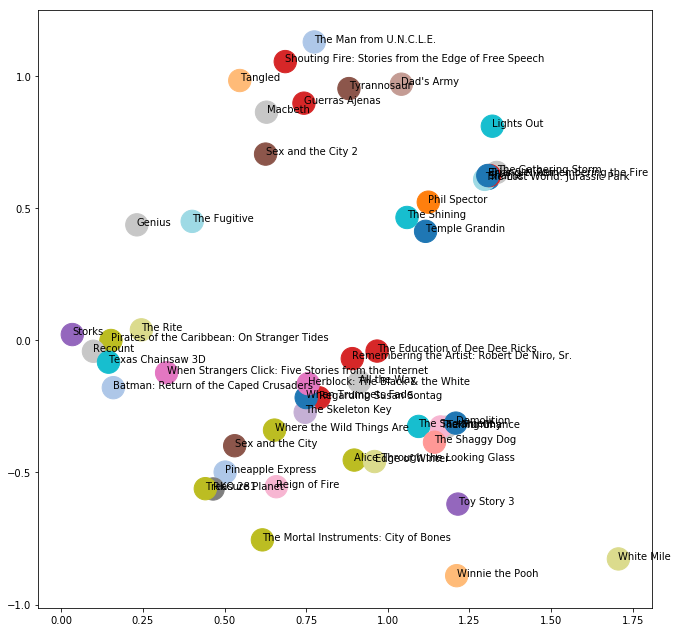

In [117]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(11,11))

plt.scatter(df_transformed_2_dim_reduced[:,0], df_transformed_2_dim_reduced[:,1], c=labels_final[50:100], s = 500, alpha = 50, cmap = 'tab20')

for i, txt in enumerate(df.title_original[50:100]):
    ax.annotate(txt, (df_transformed_2_dim_reduced[i,0], df_transformed_2_dim_reduced[i,1]))

In [35]:
def add_cluster_if_not_present(dataframe, list_clusters_complete):
    
    list_clusters = dataframe['labels'].unique()
    
    for item in list_clusters_complete:
        
        if item not in list_clusters:
            
            dataframe = dataframe.append({'labels': item, 'frecuency': 0}, ignore_index=True)
            
    return dataframe
    

In [36]:
# ===> Aanaliamos que % de las peliculas de cada plataforma pertenecen a cada cluster

def count_clusters(dataframe, name_plataform):

    df_clusters = pd.DataFrame(dataframe['labels'].value_counts())
    
    df_clusters = df_clusters.rename(columns={'labels': 'frecuency'})
    
    df_clusters['labels'] = df_clusters.index
    
    df_clusters = add_cluster_if_not_present(df_clusters, df['labels'].unique())
    
    def number_rows_parent_dataframe(dataframe):
        return len(dataframe.index)

    def cluster_porcentage(value, dataframe=dataframe):
        return value/number_rows_parent_dataframe(dataframe)*100
    
    name_column = 'percentage_clusters_' + name_plataform 
    
    df_clusters[name_column] = df_clusters['frecuency'].apply(cluster_porcentage)

    return df_clusters


In [37]:
# ===> Agregamos las etiquetas de clusters a la plataforma HBO

df_hbo = pd.merge(df_hbo, df[['id', 'labels']], on='id', how='left')

In [38]:
df_hbo.head(2)

,Unnamed: 0,Unnamed: 0.1,id,title,title_original,genres,director,keywords,cast,genre_empty,labels
0,0,0,1183,2 Fast 2 Furious: A todo gas 2,2 Fast 2 Furious,"['Acción', 'Crimen', 'Suspense']",['John Singleton'],"['miami', 'car race', 'sports car', 'los angel...","['Paul Walker', 'Tyrese Gibson', 'Eva Mendes',...",32,23
1,2,2,1457,21 gramos,21 Grams,"['Drama', 'Crimen', 'Suspense']",['Alejandro González Iñárritu'],"['life and death', 'loss of loved one', 'trans...","['Sean Penn', 'Naomi Watts', 'Benicio del Toro...",31,12


In [39]:
clusters_hbo = count_clusters(df_hbo, 'hbo')
count_clusters(df_hbo, 'hbo').head(2)

,frecuency,labels,percentage_clusters_hbo
8,13,8,9.285714
1,11,1,7.857143


In [40]:
# ===> Agregamos las etiquetas de clusters a la plataforma Claro

df_claro = pd.merge(df_claro, df[['id', 'labels']], on='id', how='left')

In [41]:
df_claro.head(2)

,Unnamed: 0,Unnamed: 0.1,id,title,title_original,genres,director,keywords,cast,genre_empty,labels
0,0,0,44,500 dias juntos,(500) Days of Summer,"['Comedia', 'Drama', 'Romance']",['Marc Webb'],"['date', 'jealousy', 'fight', 'architect', 'ga...","['Joseph Gordon-Levitt', 'Zooey Deschanel', 'C...",31,13.0
1,2,2,49,Nuestros maravillosos aliados,*batteries not included,"['Comedia', 'Familia', 'Fantasía', 'Ciencia fi...",['Matthew Robbins'],"['extraterrestrial technology', 'alien life-fo...","['Hume Cronyn', 'Jessica Tandy', 'Frank McRae'...",53,9.0


In [42]:
clusters_claro = count_clusters(df_claro, 'claro')
count_clusters(df_claro, 'claro').head(2)

,frecuency,labels,percentage_clusters_claro
1.0,170,1.0,9.670080
13.0,155,13.0,8.816837


In [43]:
# ===> Agregamos las etiquetas de clusters a la plataforma Sony

df_sony = pd.merge(df_sony, df[['id', 'labels']], on='id', how='left')

In [44]:
clusters_sony = count_clusters(df_sony, 'sony')

count_clusters(df_sony, 'sony').head(2)

,frecuency,labels,percentage_clusters_sony
0,7,10,12.500000
1,5,1,8.928571


In [45]:
# ===> Agregamos las etiquetas de clusters a la plataforma Netflix

df_netflix = pd.merge(df_netflix, df[['id', 'labels']], on='id', how='left')

In [46]:
clusters_netflix = count_clusters(df_netflix, 'netflix')

count_clusters(df_netflix, 'netflix').head(2)

,frecuency,labels,percentage_clusters_netflix
8.0,199,8.0,12.352576
1.0,142,1.0,8.814401


In [47]:
# ===> Agregamos las etiquetas de clusters a la plataforma Flow

df_flow = pd.merge(df_flow, df[['id', 'labels']], on='id', how='left')

In [48]:
clusters_flow = count_clusters(df_flow, 'flow')

count_clusters(df_flow, 'flow').head(2)

,frecuency,labels,percentage_clusters_flow
1.0,31,1.0,8.288770
6.0,27,6.0,7.219251


In [49]:
# ===> Agregamos las etiquetas de clusters a la plataforma Amazon

df_amazon = pd.merge(df_amazon, df[['id', 'labels']], on='id', how='left')

In [50]:
clusters_amazon = count_clusters(df_amazon, 'amazon')

count_clusters(df_amazon, 'amazon').head(2)

,frecuency,labels,percentage_clusters_amazon
1.0,91,1.0,11.757106
3.0,75,3.0,9.689922


In [51]:
# ===> Agregamos las etiquetas de clusters a la plataforma On Video

df_on_video = pd.merge(df_on_video, df[['id', 'labels']], on='id', how='left')

In [52]:
clusters_on_video = count_clusters(df_on_video, 'on_video')

count_clusters(df_on_video, 'on_video').head(2)

,frecuency,labels,percentage_clusters_on_video
1.0,35,1.0,11.146497
13.0,28,13.0,8.917197


In [53]:
# ===> Agregamos las etiquetas de clusters a la plataforma Fox

df_fox = pd.merge(df_fox, df[['id', 'labels']], on='id', how='left')

In [54]:
clusters_fox = count_clusters(df_fox, 'fox')

count_clusters(df_fox, 'fox').head(2)

,frecuency,labels,percentage_clusters_fox
6.0,26,6.0,10.788382
9.0,25,9.0,10.373444


In [55]:
df_clusters_final = pd.merge(clusters_hbo[['labels', 'percentage_clusters_hbo']], clusters_claro[['labels', 'percentage_clusters_claro']], on='labels', how='left')

In [56]:
df_clusters_final.head(2)

,labels,percentage_clusters_hbo,percentage_clusters_claro
0,8,9.285714,1.706485
1,1,7.857143,9.670080


In [57]:
df_clusters_final = pd.merge(df_clusters_final, clusters_sony[['labels', 'percentage_clusters_sony']], on='labels', how='left')

In [58]:
df_clusters_final = pd.merge(df_clusters_final, clusters_netflix[['labels', 'percentage_clusters_netflix']], on='labels', how='left')

In [59]:
df_clusters_final = pd.merge(df_clusters_final, clusters_flow[['labels', 'percentage_clusters_flow']], on='labels', how='left')

In [60]:
df_clusters_final = pd.merge(df_clusters_final, clusters_amazon[['labels', 'percentage_clusters_amazon']], on='labels', how='left')

In [61]:
df_clusters_final = pd.merge(df_clusters_final, clusters_on_video[['labels', 'percentage_clusters_on_video']], on='labels', how='left')

In [62]:
df_clusters_final = pd.merge(df_clusters_final, clusters_fox[['labels', 'percentage_clusters_fox']], on='labels', how='left')

In [63]:
df_clusters_final.head(2)

,labels,percentage_clusters_hbo,percentage_clusters_claro,percentage_clusters_sony,percentage_clusters_netflix,percentage_clusters_flow,percentage_clusters_amazon,percentage_clusters_on_video,percentage_clusters_fox
0,8,9.285714,1.706485,0.000000,12.352576,3.208556,5.038760,1.910828,0.829876
1,1,7.857143,9.670080,8.928571,8.814401,8.288770,11.757106,11.146497,9.958506


In [64]:
print(df_clusters_final['labels'].values)

[ 8  1 21 13 22 20 18 15 12 10 17  2  3  9  7 24 23 14 16  0 11  6  5  4
 19]


In [65]:
df_clusters_final_transpose = df_clusters_final[['percentage_clusters_hbo',	'percentage_clusters_claro',	'percentage_clusters_sony',	'percentage_clusters_netflix'	,'percentage_clusters_flow',	'percentage_clusters_amazon',	'percentage_clusters_on_video',	'percentage_clusters_fox']].transpose()

In [66]:
df_clusters_final_transpose.columns = df_clusters_final['labels'].values

In [67]:
df_clusters_final_transpose.head(2)

,8,1,21,13,22,20,18,15,12,10,...,24,23,14,16,0,11,6,5,4,19
percentage_clusters_hbo,9.285714,7.857143,7.142857,7.142857,6.428571,6.428571,6.428571,5.714286,5.000000,5.000000,...,2.142857,2.142857,2.142857,2.142857,2.142857,1.428571,1.428571,1.428571,1.428571,1.428571
percentage_clusters_claro,1.706485,9.670080,4.436860,8.816837,6.712173,3.924915,2.673493,0.796359,3.924915,5.176337,...,3.924915,4.095563,2.332196,3.412969,1.934016,4.152446,5.631399,1.706485,3.412969,2.389078


In [68]:
df_numpy_array_platforms = df_clusters_final_transpose.values

In [69]:
print(df_numpy_array_platforms)

[[ 9.28571429  7.85714286  7.14285714  7.14285714  6.42857143  6.42857143
   6.42857143  5.71428571  5.          5.          3.57142857  3.57142857
   3.57142857  2.85714286  2.14285714  2.14285714  2.14285714  2.14285714
   2.14285714  2.14285714  1.42857143  1.42857143  1.42857143  1.42857143
   1.42857143]
 [ 1.70648464  9.67007964  4.43686007  8.81683732  6.71217292  3.92491468
   2.67349261  0.7963595   3.92491468  5.17633675  2.27531286  2.10466439
   4.49374289  6.31399317  3.69738339  3.92491468  4.09556314  2.33219568
   3.41296928  1.93401593  4.15244596  5.63139932  1.70648464  3.41296928
   2.3890785 ]
 [ 0.          8.92857143  5.35714286  8.92857143  3.57142857  8.92857143
   0.          0.          7.14285714 12.5         0.          3.57142857
   0.          1.78571429  1.78571429  1.78571429  5.35714286  1.78571429
   7.14285714  5.35714286  5.35714286  7.14285714  0.          3.57142857
   0.        ]
 [12.35257604  8.81440099  2.91744258  5.27622595  4.09683426  1.11

In [70]:
# ===> Graficamos las 8 plataformas en un espacio de dos dimensiones

from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=10, metric = 'cosine', random_state=0)
#tsne = TSNE(perplexity = 10, metric='precomputed', random_state = 12)

result = tsne.fit_transform(df_numpy_array_platforms)


In [71]:
platforms = ['HBO', 'Claro', 'Sony', 'Netflix', 'Flow', 'Amazon', 'On Video', 'Fox']

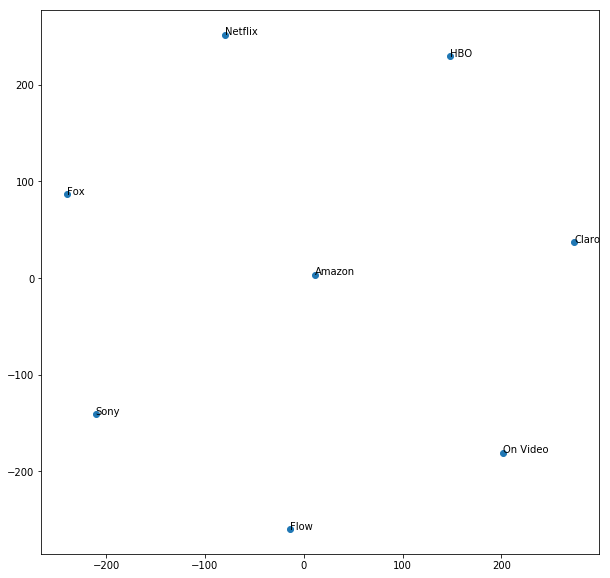

In [72]:
import matplotlib.pyplot as plt

# ===> La forma que se genera parece demasiado simetrica. Es raro, no?

fig, ax = plt.subplots(figsize=(10,10))

plt.scatter(result[:,0], result[:,1])

for i, txt in enumerate(platforms):
    ax.annotate(txt, (result[i,0], result[i,1]))

In [73]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(2, random_state=0)
clusters_transformed = svd.fit_transform(df_numpy_array_platforms)

In [74]:
print(clusters_transformed)

[[20.51940725 -3.49426059]
 [22.14311515  1.8705824 ]
 [22.56113068 13.34006483]
 [21.18731251 -8.88280699]
 [20.97600648 -0.57891551]
 [21.95018109 -5.68279985]
 [22.20025009  2.28650201]
 [22.46705559  0.16185481]]


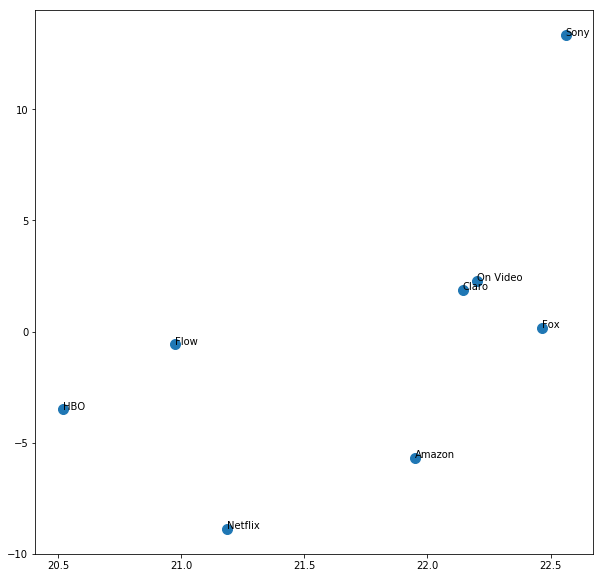

In [75]:
fig, ax = plt.subplots(figsize=(10,10))

plt.scatter(clusters_transformed[:,0], clusters_transformed[:,1], s=100)

for i, txt in enumerate(platforms):
    ax.annotate(txt, (clusters_transformed[i,0], clusters_transformed[i,1]))

In [76]:
df_clusters_final_transpose

,8,1,21,13,22,20,18,15,12,10,...,24,23,14,16,0,11,6,5,4,19
percentage_clusters_hbo,9.285714,7.857143,7.142857,7.142857,6.428571,6.428571,6.428571,5.714286,5.000000,5.000000,...,2.142857,2.142857,2.142857,2.142857,2.142857,1.428571,1.428571,1.428571,1.428571,1.428571
percentage_clusters_claro,1.706485,9.670080,4.436860,8.816837,6.712173,3.924915,2.673493,0.796359,3.924915,5.176337,...,3.924915,4.095563,2.332196,3.412969,1.934016,4.152446,5.631399,1.706485,3.412969,2.389078
percentage_clusters_sony,0.000000,8.928571,5.357143,8.928571,3.571429,8.928571,0.000000,0.000000,7.142857,12.500000,...,1.785714,5.357143,1.785714,7.142857,5.357143,5.357143,7.142857,0.000000,3.571429,0.000000
percentage_clusters_netflix,12.352576,8.814401,2.917443,5.276226,4.096834,1.117318,2.296710,6.517691,3.041589,3.786468,...,2.607076,2.731223,4.283054,3.165736,3.538175,2.917443,4.469274,0.744879,2.296710,1.489758
percentage_clusters_flow,3.208556,8.288770,2.941176,4.545455,4.010695,2.673797,1.871658,1.336898,3.475936,6.417112,...,3.743316,5.614973,4.812834,3.475936,2.406417,2.673797,7.219251,2.406417,1.336898,2.139037
percentage_clusters_amazon,5.038760,11.757106,3.746770,5.813953,4.392765,1.550388,2.067183,3.100775,3.100775,2.067183,...,3.229974,2.713178,4.780362,2.842377,2.842377,4.521964,4.780362,1.033592,2.971576,2.067183
percentage_clusters_on_video,1.910828,11.146497,3.184713,8.917197,5.414013,5.095541,3.503185,0.318471,3.821656,5.414013,...,5.732484,4.458599,1.910828,2.547771,3.184713,5.095541,3.184713,1.910828,4.140127,0.955414
percentage_clusters_fox,0.829876,9.958506,3.734440,8.713693,2.489627,4.149378,2.489627,1.244813,1.244813,2.904564,...,3.734440,3.734440,2.074689,4.149378,2.074689,0.829876,10.788382,1.244813,3.734440,2.489627


In [77]:
df_clusters_final.head(2)

,labels,percentage_clusters_hbo,percentage_clusters_claro,percentage_clusters_sony,percentage_clusters_netflix,percentage_clusters_flow,percentage_clusters_amazon,percentage_clusters_on_video,percentage_clusters_fox
0,8,9.285714,1.706485,0.000000,12.352576,3.208556,5.038760,1.910828,0.829876
1,1,7.857143,9.670080,8.928571,8.814401,8.288770,11.757106,11.146497,9.958506


In [78]:
df_clusters_final_comparison = df_clusters_final.copy()

In [97]:
df_clusters_final_comparison['claro_on_video'] =  (df_clusters_final_comparison['percentage_clusters_on_video'] - df_clusters_final_comparison['percentage_clusters_claro'])/df_clusters_final_comparison['percentage_clusters_claro']*100

In [98]:
df_clusters_final_comparison['claro_on_video'] 

0     11.974522
1     15.267891
2    -28.221460
3      1.138278
4    -19.340386
5     29.825533
6     31.034015
7    -60.009099
8     -2.630850
9      4.591587
10   -30.015924
11    -9.209847
12    -0.782069
13     0.877948
14   -39.706026
15    46.053725
16     8.864119
17   -18.067423
18   -25.350318
19    64.668415
20    22.711805
21   -43.447211
22    11.974522
23    21.305732
24   -60.009099
Name: claro_on_video, dtype: float64

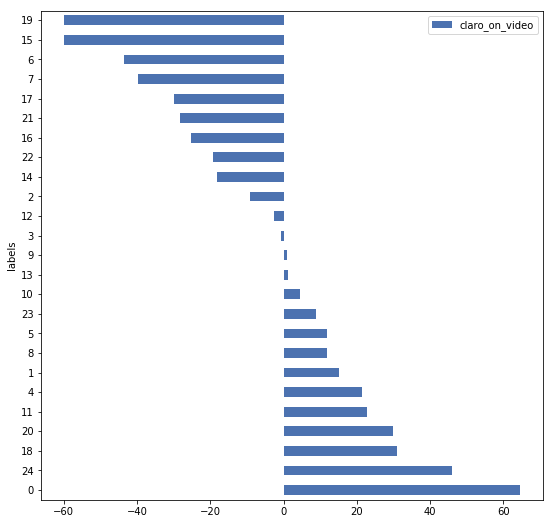

In [99]:
import seaborn as sns

df_clusters_final_comparison.sort_values(by='claro_on_video', ascending=False).plot("labels", "claro_on_video", kind="barh", color=sns.color_palette("deep", 1), figsize=(9,9))

In [82]:
df_clusters_final_comparison['claro_netflix'] = (df_clusters_final_comparison['percentage_clusters_netflix'] - df_clusters_final_comparison['percentage_clusters_claro'])/df_clusters_final_comparison['percentage_clusters_claro']*100

In [118]:
# ===> Ahora bien, Claro y Flow parece que son muy parecidas, pero puede eso deberse a que tienen mas o menos las mismas peliculas?
# ===> Primero analicemos cuantas peliculas tiene cada plataforma

print(len(df_on_video.index))
print(len(df_claro.index))

314
1758


In [119]:
df_similitud_claro_flow = pd.merge(df_claro, df_on_video, on='id', how='inner')

In [120]:
print(len(df_similitud_claro_flow))

86


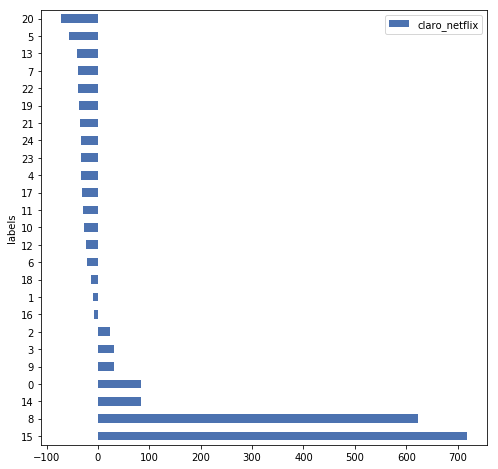

In [86]:
# ===> Se observa que para 5 clusters Claro tiene peliculas, mientras Netflix no.
# ===> A su vez, para los clsuters 13 y 4 Netflix tiene varias veces mas contenido que Claro
# ===> Otra forma de ver esto es que el peso de cierto tipo de contenido en la oferta de contenidos de Netflix
# ===> es mucho mas importante que en Claro

df_clusters_final_comparison.sort_values(by='claro_netflix', ascending=False).plot("labels", "claro_netflix", kind="barh", color=sns.color_palette("deep", 1),figsize=(8,8))

In [87]:
# ===> Funciones que nos van a permitir realizar words clouds a partir de agregar palabras de un atributo especifico
# ===> (genero, actores, etc) de las peliculas de un cluster

import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

def remove_one_from_word(dict):
    
    new_dict = dict.copy()
    
    for key, value in new_dict.items():
        
        new_dict[key] = new_dict[key] - 1
    
    return new_dict

def remove_single_items(dictionary): 
    
    main_dict = remove_one_from_word(dictionary)
    
    new_dict = {}
    
    for key, value in main_dict.items(): 

        if main_dict[key] > 0:
            new_dict[key] = main_dict[key]

    return new_dict
        
def word_cloud_words_cluster(dataframe, label, attribute):
    
    array_words = []
    
    dataframe_filter = dataframe[dataframe['labels']==label]
    
    for item in dataframe_filter[attribute]:
        
        array_words = array_words + item
    
    word_counter = Counter(array_words)
    
    words_not_unique = remove_single_items(word_counter)
    
    wordcloud = WordCloud( background_color='white').generate_from_frequencies(words_not_unique)

    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

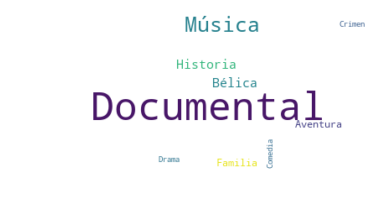

In [100]:
# ===> Tratemos de entender cuales son los atributos que las peliculas del cluster 7 (uno de los clusters para los cuales Netflix
# ===> y Claro son diferentes) comparten entre si

word_cloud_words_cluster(df, 15, 'genres')

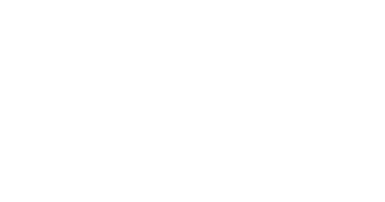

In [101]:
word_cloud_words_cluster(df, 15, 'keywords')

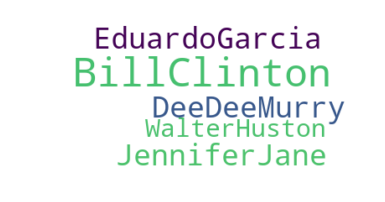

In [102]:
word_cloud_words_cluster(df, 15, 'cast')

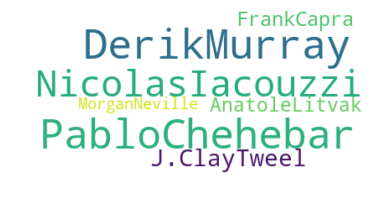

In [103]:
word_cloud_words_cluster(df, 15, 'director')

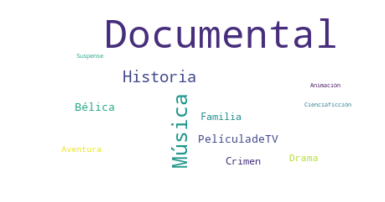

In [109]:
word_cloud_words_cluster(df, 8, 'genres')

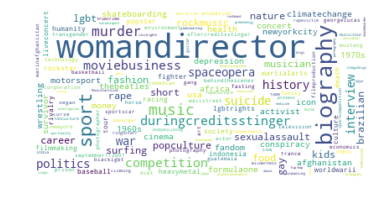

In [110]:
word_cloud_words_cluster(df, 8, 'keywords')

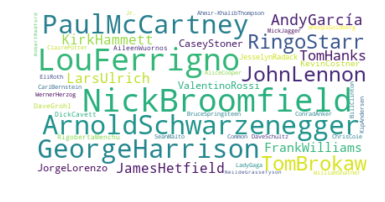

In [111]:
word_cloud_words_cluster(df, 8, 'cast')

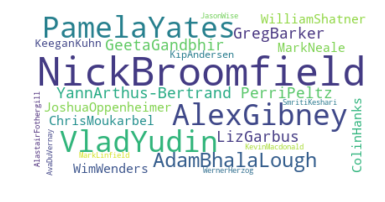

In [112]:
word_cloud_words_cluster(df, 8, 'director')

In [113]:
df[df['labels']==3]

,Unnamed: 0,Unnamed: 0.1,id,title,title_original,genres,director,keywords,cast,genre_empty,keywords_bin,genres_bin,director_bin,cast_bin,combination_bin,labels
35,375,375,28675,Jimmy's Hall,Jimmy's Hall,"[Historia, Drama]",[KenLoach],[],"[BarryWard, SimoneKirby, JimNorton, AndrewScot...",21,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...",3
39,417,417,30674,La Chica del Tren,La Fille du RER,"[Drama, Romance]",[AndréTéchiné],[],"[MichelBlanc, CatherineDeneuve, ÉmilieDequenne...",20,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...",3
40,419,419,31698,Lady Day at Emerson's Bar & Grill,Lady Day at Emerson's Bar & Grill,"[Drama, Música]",[LonnyPrice],[],"[AudraMcDonald, DavidMichaelCefalu, KatieLynnC...",19,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",3
50,541,541,42763,Phil Spector,Phil Spector,"[PelículadeTV, Drama]",[DavidMamet],[],"[HelenMirren, AlPacino, JeffreyTambor, Chiwete...",27,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...",3
100,1037,1037,69095,Manos de piedra,Hands of Stone,[Drama],[JonathanJakubowicz],[],"[RobertDeNiro, EdgarRamírez, JurneeSmollett, E...",9,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",3
13,42,42,2271,8 tiros,8 tiros,"[Drama, Acción, Crimen]",[BrunoHernandez],[],"[AlbertoAjaka, MaríaEugeniaArboleda, DanielArá...",29,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",3
19,79,79,3020,A Mile in His Shoes,A Mile in His Shoes,"[Drama, Familia]",[WilliamDear],[],"[LukeSchroder, GeorgeCanyon, DeanCain, Chilton...",20,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",3
21,82,82,3060,Doble venganza,A Nanny's Revenge,"[Drama, Suspense]",[CurtisCrawford],[],"[""JodiLynOKeefe"", MichaelWoods, VictoriaPratt,...",21,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",3
47,232,232,6835,Arráncame la vida,Arráncame la vida,"[Romance, Drama]",[RobertoSneider],[],"[AnaClaudiaTalancón, DanielGiménezCacho, JoséM...",20,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...",3
78,413,413,10516,Bróder,Bróder,[Drama],[JefersonDê],[],"[CaioBlat, JonathanHaagensen, SílvioGuindane, ...",9,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0,